## MiniMax Criterion


**MOTIVATION.** The question is what issues of the Bayes and MAP criteria lead to the need for a new criterion?
- The Bayes criterion requires both costs and *a priori* probabilities to set the threshold. 
- The MAP criterion needs only the *a priori* probabilities; it does not require knowledge of the costs. 
- In contradistinction, the minimax criterion does require knowledge of the costs but does not use the *a priori* probabilities.

To illustrate the need for the minimax criterion, consider an example of the Bayes risk $ r $ as a function of the *a priori* probability $ \pi_0 $. 

- If $ \pi_0 = 0 $, then $ H_1 $ is correct; our decision $ D_1 $ entails a Bayes risk of $ r = C_{11} $. 
    That is, if $ \pi_0 = 0 $, then 
    
    $$ r = (P_{01}C_{01} + P_{11}C_{11})\pi_1 $$
    
- Since $ \pi_1 = 1 $, $ P_{01} = 0 $, and $ P_{11} = 1 $, then $ r = C_{11} $. 
- On the other hand, if $ \pi_0 = 1 $, a similar argument shows that $ r = C_{00} $. 

### Actual risk when the a priori probability is unknown and guessed

Assume that we guess the *a priori* probability is some value $ \pi_0 = a $. 

This "freezes" the decision rule $ \delta_B $ with the Bayes threshold, set at

$$
\tau_B = \frac{a(C_{10} - C_{00})}{(1-a)(C_{01} - C_{11})} 
$$

**Actual Risk**

If we are wrong about our guess, the actual risk $ r(\pi_0, a) $ we could incur is obtained as

$$
r(\pi_0, a) = \pi_0 r_0(a) + (1 - \pi_0) r_1(a)
$$

where $ r_0(a) $ and $ r_1(a) $ are conditional risks for each hypothesis when the threshold and decision rule are controlled by $ a $. It is clear that

$$
r_j(a) = C_{1j}P_{1j} + C_{0j}P_{0j}, \quad j = 0, 1 
$$

Since $ r_0(a) $ and $ r_1(a) $ are constants for a specific value of $ a $, the actual risk is linear in $ \pi_0 $. If our guess of $ \pi_0 = a $ is correct, the actual risk is identical to the Bayes risk. On the other hand, if $ \pi_0 = 1 $ were the "true" value, the actual risk we would entail in this example would be $ r_0(a) $.

### Demonstrate the Bayes risk and the actual risk 

We use the setting in the antipodal signal dection example.

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
from scipy.special import erf, erfc
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
b = 1  # s1 = b, s0 = -b
sigma_squared = 0.25
sigma = np.sqrt(sigma_squared)
pi_0_fixed = 0.8  # given fixed prior probability for H0
pi_1_fixed = 0.2  # given fixed prior probability for H1

# Costs
C00 = 0  # Correct decision, H0
C11 = 0  # Correct decision, H1
C10 = 1  # Incorrect decision, H1|H0
C01 = 2  # Incorrect decision, H0|H1

# Calculate tau'
tau_map_fixed = pi_0_fixed / pi_1_fixed
tau_prime_fixed = (sigma_squared / (2 * b)) * np.log(tau_map_fixed)

# Define Pij based on the problem's conditions
def P00(tau_prime):
    return 0.5 * (1 + erf((tau_prime + b) / (sigma * np.sqrt(2))))

def P01(tau_prime):
    return 0.5 * (1 + erf((tau_prime - b) / (sigma * np.sqrt(2))))

def P10(tau_prime):
    return 0.5 * erfc((tau_prime + b) / (sigma * np.sqrt(2)))

def P11(tau_prime):
    return 0.5 * erfc((tau_prime - b) / (sigma * np.sqrt(2)))


#### Fig. Bayes risk as a function of $\pi_0$

The Bayes risk at $ \pi_0 = a $ is shown in the following figure.

In most cases, $ r $ is larger at intermediate values of $ \pi_0 $. 

Indeed, it is straightforward to show that $ r $ is a concave function in $ \pi_0 $. 

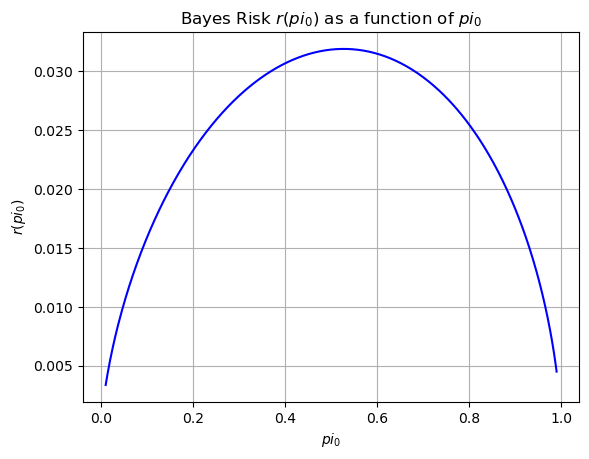

In [11]:
# Recalculate the Bayes risk for various values of pi_0

# Define the range of pi0
pi0_values = np.linspace(0.01, .99, 500)

# The decision threshold tau_B is derived from the Bayes criterion
def bayes_risk(pi_0):
    pi_1 = 1 - pi_0
    tau_B = (pi_0 * (C10 - C00)) / (pi_1 * (C01 - C11))
    tau_prime_B = (sigma_squared / (2 * b)) * np.log(tau_B)
    # Calculate Pij values for the current pi_0
    P00_val = P00(tau_prime_B)
    P01_val = P01(tau_prime_B)
    P10_val = P10(tau_prime_B)
    P11_val = P11(tau_prime_B)
    # Calculate r0(a) and r1(a)
    r0_B = C10 * P10_val + C00 * P00_val
    r1_B = C01 * P01_val + C11 * P11_val
    # Calculate the Bayes risk
    return pi_0 * r0_B + pi_1 * r1_B

# Calculate Bayes risk values
bayes_r_values = [bayes_risk(pi_0) for pi_0 in pi0_values]

# Plotting the Bayes risk as a function of pi0
plt.plot(pi0_values, bayes_r_values, label='$Bayes Risk r(pi_0)$', color='blue')
plt.title('Bayes Risk $r(pi_0)$ as a function of $pi_0$')
plt.xlabel('$pi_0$')
plt.ylabel('$r(pi_0)$')
plt.grid(True)
plt.show()


### Actual risk as a function of $\pi_0$

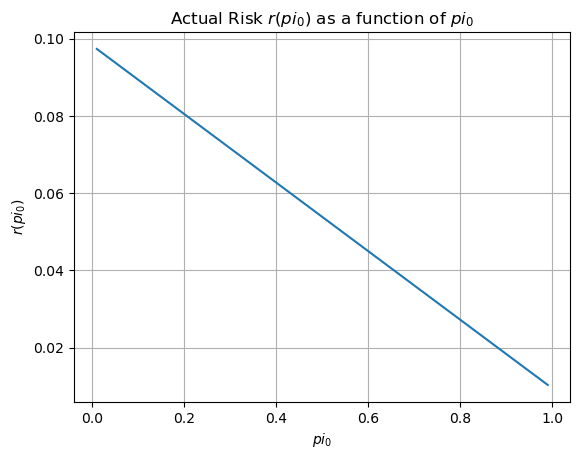

In [12]:
# Define the actual risk function r(pi0, a)
def actual_risk(pi_0):
    pi_1 = 1 - pi_0
    # Calculate Pij values for the current pi_0
    P00_val = P00(tau_prime_fixed)
    P01_val = P01(tau_prime_fixed)
    P10_val = P10(tau_prime_fixed)
    P11_val = P11(tau_prime_fixed)
    # Calculate r0(a) and r1(a)
    r0 = C10 * P10_val + C00 * P00_val
    r1 = C01 * P01_val + C11 * P11_val
    # Calculate the actual risk
    return pi_0 * r0 + pi_1 * r1


r_values = [actual_risk(pi_0) for pi_0 in pi0_values]

# Plotting the actual risk as a function of pi0
plt.plot(pi0_values, r_values, label='$r(pi_0)$')
plt.title('Actual Risk $r(pi_0)$ as a function of $pi_0$')
plt.xlabel('$pi_0$')
plt.ylabel('$r(pi_0)$')
plt.grid(True)
plt.show()


### Actual and Bayes risks as a function of $\pi_0$

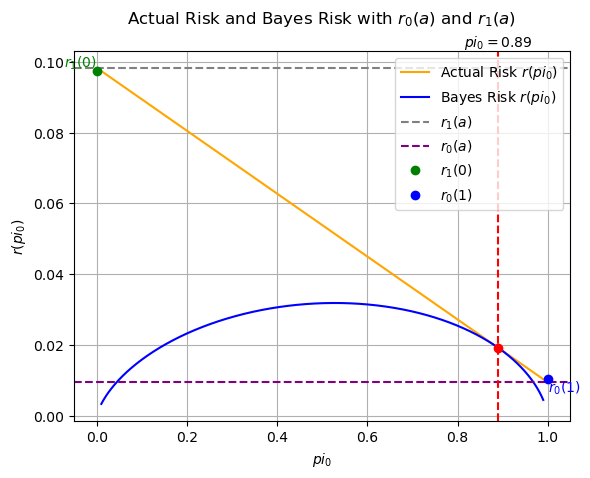

In [13]:
# Recalculate r1(a) and r0(a) with a specific value of `a`
a = 0.7
r1_a = C01 * P01(tau_prime_fixed) + C11 * P11(tau_prime_fixed)
r0_a = C10 * P10(tau_prime_fixed) + C00 * P00(tau_prime_fixed)

# Find the intersection point between actual risk and Bayes risk
diff = np.abs(np.array(r_values) - np.array(bayes_r_values))
intersection_index = np.argmin(diff)
intersection_pi0 = pi0_values[intersection_index]
intersection_risk = r_values[intersection_index]

# Calculate the endpoints of the actual risk
r1_0 = r_values[0]  # Actual risk at pi_0 = 0
r0_1 = r_values[-1]  # Actual risk at pi_0 = 1

# Create a plot with additional annotations
fig, ax = plt.subplots()

# Plotting the actual risk and Bayes risk
ax.plot(pi0_values, r_values, label='Actual Risk $r(pi_0)$', color='orange')
ax.plot(pi0_values, bayes_r_values, label='Bayes Risk $r(pi_0)$', color='blue')

# Annotating r1(a) and r0(a)
ax.axhline(y=r1_a, color='gray', linestyle='--', label='$r_1(a)$')
ax.axhline(y=r0_a, color='purple', linestyle='--', label='$r_0(a)$')

# Annotating the intersection point
ax.plot(intersection_pi0, intersection_risk, 'ro')  # Point
ax.axvline(intersection_pi0, color='red', linestyle='--')  # Projection on x-axis
ax.text(intersection_pi0, ax.get_ylim()[1], f'$pi_0 = {intersection_pi0:.2f}$', ha='center', va='bottom')

# Annotating the endpoints r1(0) and r0(1)
ax.plot(0, r1_0, 'go', label='$r_1(0)$')  # Endpoint r1(0)
ax.plot(1, r0_1, 'bo', label='$r_0(1)$')  # Endpoint r0(1)

# Adding labels for endpoints
ax.text(0, r1_0, f'$r_1(0)$', ha='right', va='bottom', color='green')
ax.text(1, r0_1, f'$r_0(1)$', ha='left', va='top', color='blue')

# Setting labels and title
ax.set_title('Actual Risk and Bayes Risk with $r_0(a)$ and $r_1(a)$ \n')
ax.set_xlabel('$pi_0$')
ax.set_ylabel('$r(pi_0)$')

# Adding grid, legend, and show plot
ax.grid(True)
ax.legend()
plt.show()



## Decision using MiniMax Criterion

**OBJECTIVE.** The minimax criterion **minimizes** the **maximum** risk. 

The maximin criterion also **maximizes** the **minimum** risk. 

In the example above, the minimax criterion would assume the value of $ \pi_0 $ such that the actual risk is a constant represented by the dotted line.

### Decision Making

**METHODOLOGY.** The question is how to use the minimax criterion to make decision $D_0$ or $D_1$.

Three different situations must be examined in determining the minimax criterion.

1. The case where the minimax criterion corresponds to $ \pi_0 = 0 $ or $ \pi_0 = 0 $ or $ \pi_0 = 1 $. 

2. The case where the minimax solution corresponds to $ \pi_0 $ interior to the interval $ (0, 1) $ and the Bayes risk is differentiable at this solution. 

3. The case where the minimax solution corresponds to $ \pi_0 $ interior to $ (0, 1) $ but the Bayes risk is not differentiable at this solution.

Each of these cases is presented in one of the following sections.

### Endpoint Minimax Solution

In some cases of using the Bayes risk, the minimax solution is to always decide $ D_1 $. Since the minimax risk for an endpoint maximum is always either $ C_{00} $ or $ C_{11} $, the easiest way to determine this case is to first try to find a minimax solution using the approaches of the following two sections. If this attempt is successful, we simply compare Here is the transcript of the provided image:

the risk so obtained with $ C_{00} $ and $ C_{11} $ and pick the maximum. If, however, we are unsuccessful in finding an internal minimax using the approaches of the next two sections, then the minimax solution is one of the endpoints. In this case, the risk is the maximum of $ C_{00} $ or $ C_{11} $."

**DISCUSSION.** This solution applies when the minimax risk occurs at one of the endpoints of the decision space, meaning $ \pi_0 = 0 $ or $ \pi_0 = 1 $.

#### Decision Rule:
- **If the minimax risk corresponds to $ \pi_0 = 0 $**: The decision rule would be to always choose $ H_1 $ since the risk associated with $ C_{11} $ (the cost when $ H_1 $ is true and $ H_1 $ is chosen) is considered.
  - **Decision**: Choose $ D_1 $ for any observation $ y $.
- **If the minimax risk corresponds to $ \pi_0 = 1 $**: The decision rule would be to always choose $ H_0 $ since the risk associated with $ C_{00} $ (the cost when $ H_0 $ is true and $ H_0 $ is chosen) is considered.
  - **Decision**: Choose $ D_0 $ for any observation $ y $.

### Differentiable Interior Minimax Solution

In this case, we want to pick a value of $ \pi_0 $ such that the _slope_ of the risk $ r(\pi_0, a) $ is zero. 

From actual risk definition, differentiating $ r(\pi_0, a) $ by $ \pi_0 $, we see that the minimax solution corresponds to the point where

$$
r_0(a) = r_1(a) 
$$

That is, the minimax solution corresponds to the point where the two conditional risks are identical. 

We attempt to find the value of $ a $ and the associated minimax threshold $ \tau_{MM} $, given by

$$
\tau_{MM} = \frac{a(C_{10} - C_{00})}{(1 - a)(C_{01} - C_{11})}
$$

where $ r_0(a) = r_1(a) $. 

In many practical situations, it is easier to find the decision regions $ R_0 $ and $ R_1 $ rather than the *a priori* probability $ a $. 

This occurs when the minimax solution lies at an interior point of the decision space, typically where the conditional risks $ r_0(a) $ and $ r_1(a) $ are equal.

#### Decision Making Procedure
- **Calculate the threshold $ \tau_{MM} $** using:

   $$
   \tau_{MM} = \frac{a(C_{10} - C_{00})}{(1 - a)(C_{01} - C_{11})}
   $$

   where $ a $ is the minimax *a priori* probability.

- **Calculate the likelihood ratio $ L(y) $**:

   $$
   L(y) = \frac{p(y|H_1)}{p(y|H_0)}
   $$

- **Make the decision**:
   - If $ L(y) > \tau_{MM} $, choose $ D_1 $.
   - If $ L(y) \leq \tau_{MM} $, choose $ D_0 $.

### Nondifferentiable Interior Minimax Solution

This case always arises when the underlying conditional probabilities $ p(y|H_0) $ and $ p(y|H_1) $ are discrete or hybrid. 

In such a case, the likelihood ratio $ L(y) $ is not differentiable everywhere. To find the minimax solution in this case, we adopt an approach as follows.

Define two decision rules. 

The first is defined by letting $ \pi_0 $ approach $ a $ from below, that is,

$$
a^- = \lim_{\epsilon \to 0} (a - \epsilon)
$$

and it has an associated decision region for $ H_1 $ of

$$
R_1^- = \{ y : L(y) > \frac{a^-(C_{10} - C_{00})}{(1 - a^-)(C_{01} - C_{11})} \}
$$

The second decision rule is defined by letting $ \pi_0 $ approach $ a $ from above,

$$
a^+ = \lim_{\epsilon \to 0} (a + \epsilon)
$$

Its associated decision region is

$$
R_1^+ = \{ y : L(y) > \frac{a^+(C_{10} - C_{00})}{(1 - a^+)(C_{01} - C_{11})} \}
$$

The critical region occurs when $ L(y) $ equals the threshold. 

The minimax decision rule for this case of a nondifferentiable interior solution, defined around the critical region, can be stated as

$$
\delta_{MM}(y) = 
\begin{cases} 
1, & L(y) > \tau_{MM} \\
\eta, & L(y) = \tau_{MM} \\
0, & L(y) < \tau_{MM}
\end{cases} 
$$

and is known as a randomization rule. 

If $ L(y) $ exceeds $ \tau_{MM} $, decide $ D_1 $. If $ L(y) < \tau_{MM} $, decide $ D_0 $. If $ L(y) = \tau_{MM} $, decide $ D_1 $ with probability $ \eta $.

We want to pick the variable $ \eta $ so that the conditional risk associated with decision $ D_1 $ and the decision rule $ \delta_{MM} $ is the same as the conditional risk associated with decision $ D_0 $ and $ \delta_{MM} $. For this case, these conditional risks are labeled as $ \delta r_j $, $ j = 0, 1 $.

It is assumed that region $ R_1^- $ occurs with probability $ \eta $ and $ R_1^+ $ with probability $ (1 - \eta) $. Now, the conditional risks are

$$
\delta r_j = \eta r_j(a^-) + (1 - \eta) r_j(a^+), \quad j = 0, 1 
$$

Our guide of equality for $ j = 0 $ and $ j = 1 $ in the above equation is achieved if

$$
\eta = \frac{r_0(a^+) - r_1(a^+)}{r_0(a^+) - r_1(a^+) + r_1(a^-) - r_0(a^-)}
$$

**DISCUSSION.** This case arises when the likelihood ratio $ L(y) $ is not differentiable everywhere, often due to discrete or hybrid conditional probabilities.

#### Decision Making Procedure
- **Define two critical values $ a^- $ and $ a^+ $**:
   - $ a^- $ approaches $ a $ from below.
   - $ a^+ $ approaches $ a $ from above.

- **Determine the decision regions**:
   - **Region $ R_1^- $**: Decision $ D_1 $ is made if $ L(y) > \frac{a^-(C_{10} - C_{00})}{(1 - a^-)(C_{01} - C_{11})} $.
   - **Region $ R_1^+ $**: Decision $ D_1 $ is made if $ L(y) > \frac{a^+(C_{10} - C_{00})}{(1 - a^+)(C_{01} - C_{11})} $.

- **Critical Region and Randomization**:
   - Define a threshold $ \tau_{MM} $ around which decisions are randomized.
   - **Decision Rule $ \delta_{MM}(y) $**:

     $$
     \delta_{MM}(y) = 
     \begin{cases} 
     1, & L(y) > \tau_{MM} \\
     \eta, & L(y) = \tau_{MM} \\
     0, & L(y) < \tau_{MM}
     \end{cases}
     $$
     
   - Here, $ \eta $ is a probability chosen such that the conditional risks are balanced. 
   - If $ L(y) = \tau_{MM} $, the decision $ D_1 $ is made with probability $ \eta $ and $ D_0 $ with probability $ 1 - \eta $.

**DISCUSSION.** $ a $ represents a guessed or estimated value for the *a priori* probability $ \pi_0 $. 

It is not necessarily the true value of $ \pi_0 $; rather, it is a value that we assume in order to set the decision threshold and determine the Bayes risk $ r(\pi_0, a) $. 

The actual value of $ \pi_0 $ may differ, leading to a discrepancy between the assumed and actual risks. 

The minimax criterion seeks to minimize the worst-case risk that could arise from incorrect assumptions about $ \pi_0 $.

## Example: Antipodal Signal Detection and Decision Using MiniMax Criterion


This example [B2, Ex 4.9] continues previous example, we assume that:
- $ \pi_0 $ is unknown, 
- the costs given as previously, namely $ C_{00} = C_{11} = 0 $, $ C_{10} = 1 $, and $ C_{01} = 2 $.

Since $ C_{00} $ and $ C_{11} $ are both zero, we know that the minimax solution corresponds to an *a priori* probability interior to the interval $(0, 1)$; i.e., it is not an endpoint solution. 

Furthermore, since this example is associated with continuous random variables, we are dealing with _a differentiable interior minimax solution_. 

In these examples, we have used the log-likelihood ratio, and the results have shown that we decide $ D_1 $ if $ y \geq \tau_{MM}' $ and $ D_0 $ if $ y < \tau_{MM}' $, where $ \tau_{MM}' $ is the log-likelihood minimax threshold. 

We want to find a threshold $ \tau_{MM}' $ such that

$$
C_{10}P_{10} + C_{00}P_{00} = C_{11}P_{11} + C_{01}P_{01}
$$

or, in this case,

$$
P_{10} = 2P_{01}
$$

It is easy to show that this can be written as

$$
2 \int_{-\infty}^{\tau_{MM}'} \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left( -\frac{(y - b)^2}{2\sigma^2} \right) dy = \int_{\tau_{MM}'}^{\infty} \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left( -\frac{(y + b)^2}{2\sigma^2} \right) dy
$$

or

$$
\text{erf} \left( \frac{b - \tau_{MM}'}{\sqrt{2\sigma}} \right) - \frac{1}{2} \text{erf} \left( \frac{\tau_{MM}' + b}{\sqrt{2\sigma}} \right) = \frac{1}{2}
$$

A simple way to find the solution to this transcendental equation is to define a function as

$$
f = \text{erf} \left( \frac{b - \tau_{MM}'}{\sqrt{2\sigma}} \right) - \frac{1}{2} \text{erf} \left( \frac{\tau_{MM}' + b}{\sqrt{2\sigma}} \right) - \frac{1}{2}
$$


After some computation, we obtain $ \tau_{MM}' \approx -0.073 $ for $ b = 1 $ and $ \sigma^2 = 0.25 $. 

Thus, the decision rule is

$$
\delta_{MM}(y) = 
\begin{cases}
1, & y \geq -0.073 \\
0, & y < -0.073
\end{cases}
$$

### Numerical results

Plot $ f $ for $ b = 1 $ and $ \sigma^2 = 0.25 $ as a function of $ \tau_{MM}' $

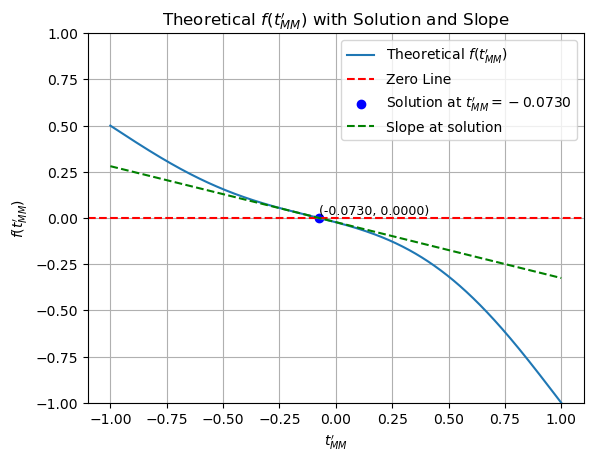

In [14]:
# Improved version of the code including the required features
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.optimize import fsolve
from scipy.misc import derivative

# Given values for the example
b = 1
sigma_squared = 0.25
sigma = np.sqrt(sigma_squared)

# Define the function f 
def f(t_MM_prime):
    term1 = erf((b - t_MM_prime) / np.sqrt(2 * sigma_squared))
    term2 = 0.5 * erf((t_MM_prime + b) / np.sqrt(2 * sigma_squared))
    return term1 - term2 - 0.5

# Define the range of t_MM_prime to evaluate the function f
t_MM_prime_values = np.linspace(-1, 1, 1000)
f_values = [f(t) for t in t_MM_prime_values]

# Solve for tau_MM_prime where the function equals zero
tau_MM_prime_solution = fsolve(f, 0)[0]

# Calculate the slope at the solution point
slope_at_solution = derivative(f, tau_MM_prime_solution, dx=1e-6)

# Plot the function f and notate the solution
plt.plot(t_MM_prime_values, f_values, label='Theoretical $f(t_{MM}^\\prime)$')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.scatter(tau_MM_prime_solution, f(tau_MM_prime_solution), color='blue', label=f'Solution at $t_{{MM}}^\\prime={tau_MM_prime_solution:.4f}$')
plt.text(tau_MM_prime_solution, f(tau_MM_prime_solution), f'({tau_MM_prime_solution:.4f}, {f(tau_MM_prime_solution):.4f})', fontsize=9, verticalalignment='bottom')

# Plot the slope line at the solution
tangent_line = slope_at_solution * (t_MM_prime_values - tau_MM_prime_solution) + f(tau_MM_prime_solution)
plt.plot(t_MM_prime_values, tangent_line, color='green', linestyle='--', label='Slope at solution')

# Additional plot settings
plt.title('Theoretical $f(t_{MM}^\\prime)$ with Solution and Slope')
plt.xlabel('$t_{MM}^\\prime$')
plt.ylabel('$f(t_{MM}^\\prime)$')
plt.ylim(-1, 1)
plt.grid(True)
plt.legend()
plt.show()


### Schonhoff's Method

In the following computation
- `erf` is used to compute the error function 
- `fzero` is used to find the zeroes of the function. 
- `efund.m` and `edf.m` is used to find the result
- `edif.m` is for the plot.

Estimated Error Probability: 0.0
Minimax Threshold: -0.07301030447230179


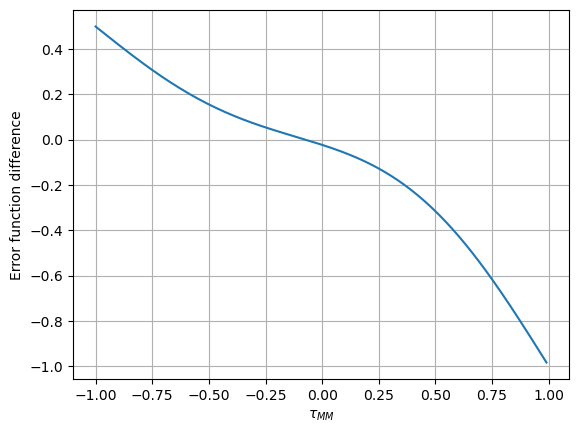

In [15]:
import numpy as np
from scipy.special import erf
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Error function difference (EDF) function
# Inputs:
#   b = the mean for a Gaussian pdf
#   sig = standard deviation for a Gaussian pdf
#   tMM = log-likelihood minimax threshold
# Outputs:
#   Error function difference for specified tMM
def edf(tMM, b, sig):
    arg1 = (b - tMM) / (np.sqrt(2) * sig)
    arg2 = (b + tMM) / (np.sqrt(2) * sig)
    return erf(arg1) - 0.5 * erf(arg2) - 0.5

# Estimated Error Probability
# Inputs:
#   nsam = number of samples
#   snrdb = signal-to-noise ratio in dB
# Outputs:
#   Probability of error displayed for specified snr in dB
def err(nsam, snrdb):
    b = np.sqrt(12 * 10**(-0.1 * snrdb))
    n = (2 * np.random.rand(nsam) - 1) * (b / 2)
    sr = 2 * np.random.rand(nsam) - 1
    s = np.where(sr > 0, 1, -1)
    y = s + n
    d = np.where(y > 0, 1, -1)
    nerr = np.sum(d != s)
    pe = nerr / nsam
    return pe

# Error function difference solution
# Inputs:
#   b = the mean for a Gaussian pdf
#   sig = standard deviation for a Gaussian pdf
# Outputs:
#   Error function difference solution (threshold)
def efund(b, sig):
    tol = 0.01
    threshold = fsolve(lambda tMM: edf(tMM, b, sig), [-1], xtol=tol)
    return threshold[0]

# Error function difference plot
# Inputs:
#   b = the mean for a Gaussian pdf
#   sig = standard deviation for a Gaussian pdf
# Outputs:
#   Error function difference plotted versus tMM
def edif(b, sig):
    tMM = np.arange(-1, 1, 0.01)
    arg1 = (b - tMM) / (np.sqrt(2) * sig)
    arg2 = (b + tMM) / (np.sqrt(2) * sig)
    ed_plot = erf(arg1) - 0.5 * erf(arg2) - 0.5
    plt.plot(tMM, ed_plot)
    plt.xlabel(r'$\tau_{MM}$')
    plt.ylabel('Error function difference')
    plt.grid(True)
    plt.show()

# Example usage
if __name__ == "__main__":
    b = 1
    sig = 0.5
    nsam = 10000
    snrdb = 10
    
    # Estimated Error Probability
    pe = err(nsam, snrdb)
    print(f"Estimated Error Probability: {pe}")

    # Error function difference solution
    threshold = efund(b, sig)
    print(f"Minimax Threshold: {threshold}")

    # Plot Error function difference
    edif(b, sig)


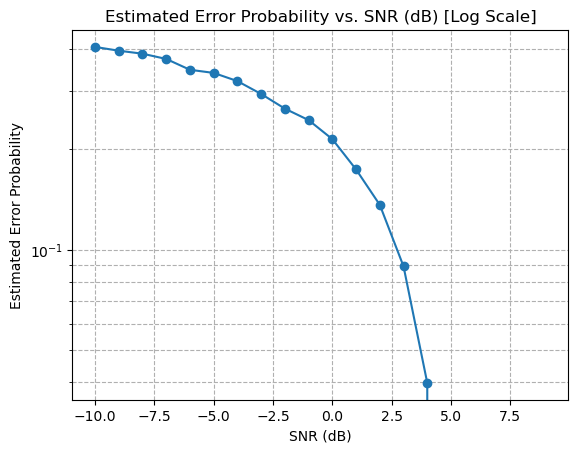

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Estimated Error Probability
# Inputs:
#   nsam = number of samples
#   snrdb = signal-to-noise ratio in dB
# Outputs:
#   Probability of error displayed for specified snr in dB
def err(nsam, snrdb):
    b = np.sqrt(12 * 10**(-0.1 * snrdb))
    n = (2 * np.random.rand(nsam) - 1) * (b / 2)
    sr = 2 * np.random.rand(nsam) - 1
    s = np.where(sr > 0, 1, -1)
    y = s + n
    d = np.where(y > 0, 1, -1)
    nerr = np.sum(d != s)
    pe = nerr / nsam
    return pe

# Function to plot Estimated Error Probability as a function of SNR in dB (log scale)
def plot_error_probability_vs_snr_log():
    nsam = 10000  # Number of samples
    snrdb_values = np.arange(-10, 10, 1)  # SNR range in dB
    pe_values = [err(nsam, snrdb) for snrdb in snrdb_values]
    
    plt.plot(snrdb_values, pe_values, marker='o')
    plt.xlabel('SNR (dB)')
    plt.ylabel('Estimated Error Probability')
    plt.yscale('log')
    plt.title('Estimated Error Probability vs. SNR (dB) [Log Scale]')
    plt.grid(True, which='both', linestyle='--')
    plt.show()

# Example usage
if __name__ == "__main__":
    plot_error_probability_vs_snr_log()

